<a href="https://colab.research.google.com/github/nicoussj/MachineLearning/blob/main/%C3%81rbol_de_decisi%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports


In [ ]:
# Importación de librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
import warnings

# Configuraciones para gráficos
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)

# Ignorar advertencias
warnings.filterwarnings('ignore')

## Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
    name=fn
df = pd.read_csv(name, sep=";", encoding='latin1', header=0)

df.columns = df.columns.str.replace(';', '')

df.head(10)

df = df.dropna()
df['RoundStartingEquipmentValue'] = df['RoundStartingEquipmentValue'].fillna(df['RoundStartingEquipmentValue'].median())
df = pd.get_dummies(df, columns=['Map'], drop_first=True)
#Cambio de datos: Cambiar de False4 en RoundWinner a False, agregar False a MatchWinner, ya que en contexto aplica
df.loc[29,'MatchWinner'] = 'False'
df.loc[29,'RoundWinner'] = 'False'
#Se eliminará columna Unnamed: 0, ya que solo contiene las ID de las filas
#Se eliminará AbnormalMatch, ya que contiene solamente valores False
df.drop(columns=['Unnamed: 0'], inplace=True)
df.drop(columns=['AbnormalMatch'], inplace=True)

Saving Anexo ET_demo_round_traces_2022.csv to Anexo ET_demo_round_traces_2022.csv


## Árbol de decisión

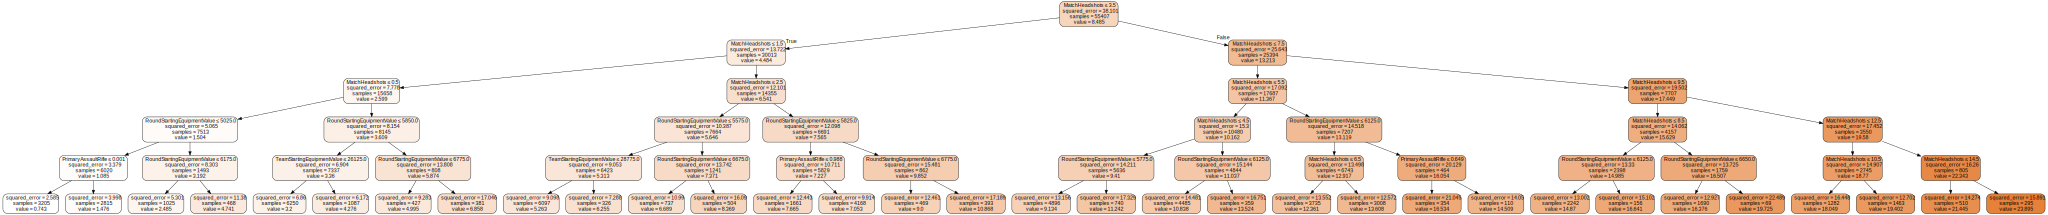

In [ ]:
# prompt: Genera un grafico de arbol de decision de regresion sobre las matchkills vs las matchheadshot puedes usar estas columnas para que sea más preciso: RoundStartingEquipmentValue, TeamStartingEquipmentValue, PrimaryAssaultRifle

import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
import graphviz
from sklearn.model_selection import train_test_split # Import train_test_split

# Since the request is for a REGRESSION tree on 'MatchKills' vs 'MatchHeadshots'
# using other features for precision, we should use DecisionTreeRegressor.
# The target variable for regression should be continuous, like 'MatchKills' or 'MatchHeadshots'.
# Let's assume we want to predict 'MatchKills' based on the other features.
# Or predict 'MatchHeadshots' based on the other features.

# The original request was "Genera un grafico de arbol de decision de regresion sobre las matchkills vs las matchheadshot"
# This phrasing is a bit ambiguous. It could mean:
# 1. Predict 'MatchKills' using 'MatchHeadshots' and other features.
# 2. Predict 'MatchHeadshots' using 'MatchKills' and other features.
# 3. Predict one of them using all others.

# Let's try predicting 'MatchKills' using the specified features.
features_reg = ['MatchHeadshots', 'RoundStartingEquipmentValue', 'TeamStartingEquipmentValue', 'PrimaryAssaultRifle']
target_reg = 'MatchKills'

# Ensure the target variable is numeric for regression
df_model_reg = df[features_reg + [target_reg]].copy()

# Handle potential missing values
df_model_reg = df_model_reg.dropna()

# Convert 'PrimaryAssaultRifle' to numeric if it's not already
df_model_reg['PrimaryAssaultRifle'] = pd.to_numeric(df_model_reg['PrimaryAssaultRifle'], errors='coerce')
df_model_reg = df_model_reg.dropna() # Drop rows where conversion failed

X_reg = df_model_reg[features_reg]
y_reg = df_model_reg[target_reg]

# Split the data
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

# Create a Decision Tree Regressor model
model_reg = DecisionTreeRegressor(random_state=42, max_depth=5) # Limiting depth for visualization

# Train the model
model_reg.fit(X_train_reg, y_train_reg)

# Visualize the regression tree
# !pip install graphviz
dot_data_reg = tree.export_graphviz(model_reg, out_file=None,
                     feature_names=features_reg,
                     filled=True, rounded=True,
                     special_characters=True)
graph_reg = graphviz.Source(dot_data_reg)

# To display in notebook:
graph_reg

## Metricas

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predicciones
y_pred_reg = model_reg.predict(X_test_reg)

# Métricas
mae = mean_absolute_error(y_test_reg, y_pred_reg)
mse = mean_squared_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_reg, y_pred_reg)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

MAE: 2.50
MSE: 11.08
RMSE: 3.33
R²: 0.72
